# CAR PRICE PREDICTION


## Importing the required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler,power_transform,LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [237]:
df = pd.read_csv('Cars_DF.csv')

In [243]:
df

Name    KM_driven Variant Number_of_Owners  \
0        2015 Maruti Alto 800     7,478 km  Petrol        2nd Owner   
1         2014 Maruti Celerio    15,206 km  Petrol        1st Owner   
2        2015 Maruti Alto 800     9,969 km  Petrol        1st Owner   
3        2015 Maruti Alto K10     9,013 km  Petrol        1st Owner   
4     2012 Maruti Wagon R 1.0    21,852 km  Petrol        1st Owner   
...                       ...          ...     ...              ...   
7463       2018 Skoda Octavia    24,939 km  Petrol        1st Owner   
7464        2014 Maruti Swift    69,860 km  Diesel        2nd Owner   
7465        2011 Honda Accord  1,44,202 km  Petrol        1st Owner   
7466          2018 Tata NEXON    30,475 km  Diesel        1st Owner   
7467           2012 Ford Figo  1,03,525 km  Diesel        2nd Owner   

           Price   Location  
0      ₹2,63,599       Pune  
1      ₹3,55,499       Pune  
2      ₹2,78,599       Pune  
3      ₹3,40,999       Pune  
4      ₹2,60,999       Pune  
...          ...        ...  
7463  ₹20,82,799  Bangalore  
7464   ₹5,04,000  Bangalore  
7465   ₹5,23,999  Bangalore  
7466  ₹10,50,299  Bangalore  
7467   ₹3,38,599  Bangalore  

[7468 rows x 6 columns]

In [226]:
#i have extracted 7468 rows of cars data
df.shape

(7468, 9)

## EDA (Exploratory Data Analysis)

In [244]:
df.shape

(7468, 6)

In [245]:
df.columns

Index(['Name', 'KM_driven', 'Variant', 'Number_of_Owners', 'Price',
       'Location'],
      dtype='object')

In [246]:
df.dtypes

Name                object
KM_driven           object
Variant             object
Number_of_Owners    object
Price               object
Location            object
dtype: object

In [247]:
#lets check for null values
df.isnull().sum()

Name                0
KM_driven           0
Variant             0
Number_of_Owners    0
Price               0
Location            0
dtype: int64

In [248]:
#lets print out the columns with unique values
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,len(pd.unique(df[i])))

Name 658
KM_driven 5832
Variant 5
Number_of_Owners 5
Price 4127
Location 5


## Data Preprocessing

In [249]:
import re

In [250]:
#extracting year from name
def year(x):
    year_built = re.search(r'^\d+',x)
    return year_built.group()

In [251]:
df['Year'] = df['Name'].apply(year)

In [252]:
df.Year.value_counts()

2015    923
2017    903
2016    892
2014    842
2018    775
2013    730
2012    648
2019    486
2011    436
2010    358
2020    179
2009    171
2008     97
2007     16
2021     12
Name: Year, dtype: int64

In [253]:
#extracting brand from name
def company(x):
    brand_name = re.search(r'^\d+\s(\w+)\s',x)
    return brand_name.group(1)

In [254]:
df['brand'] = df['Name'].apply(company)

In [255]:
df.brand.value_counts()

Maruti        3409
Hyundai       1595
Honda          596
Toyota         395
Volkswagen     276
Renault        249
Ford           210
Mahindra       187
Tata           158
Skoda           85
BMW             43
Nissan          42
Mercedes        36
Chevrolet       35
MG              32
KIA             31
Jeep            25
Datsun          22
Audi            17
Fiat            10
Mitsubishi       4
Ssangyong        4
Landrover        3
Jaguar           1
TOYOTA           1
Force            1
ISUZU            1
Name: brand, dtype: int64

In [256]:
#extracting Model from name
def Model_name(x):
    model_name = re.search(r'^\d+\s\w+\s(\w+.*)',x)
    return model_name.group(1)

In [257]:
df['Model'] = df.Name.apply(Model_name)

In [258]:
df.Model.value_counts()

Swift             573
Swift Dzire       390
Wagon R 1.0       331
Grand i10         289
Alto 800          263
                 ... 
Pajero              1
X3                  1
Benz GLA Class      1
Classic             1
Safari Storme       1
Name: Model, Length: 169, dtype: int64

In [259]:
#now lets from our name coulmn as we have extracted all the data from it
df.drop('Name',axis =1 ,inplace=True)

In [260]:
#lets replace 'km' with space in Km_driven column
df["KM_driven"] = df.KM_driven.str.replace("km","")  #replace km with null
df["KM_driven"] = df.KM_driven.str.replace(",","")  #replacing , with null
df["KM_driven"]= df["KM_driven"].astype('int')  #converting to int

In [261]:
#Lets remove the unwanted sysmbols from price column
df["Price"] =df.Price.str.replace("₹","")
df["Price"] =df.Price.str.replace(",","")
df["Price"] =df.Price.astype('int')

In [262]:
df

KM_driven Variant Number_of_Owners    Price   Location  Year   brand  \
0          7478  Petrol        2nd Owner   263599       Pune  2015  Maruti   
1         15206  Petrol        1st Owner   355499       Pune  2014  Maruti   
2          9969  Petrol        1st Owner   278599       Pune  2015  Maruti   
3          9013  Petrol        1st Owner   340999       Pune  2015  Maruti   
4         21852  Petrol        1st Owner   260999       Pune  2012  Maruti   
...         ...     ...              ...      ...        ...   ...     ...   
7463      24939  Petrol        1st Owner  2082799  Bangalore  2018   Skoda   
7464      69860  Diesel        2nd Owner   504000  Bangalore  2014  Maruti   
7465     144202  Petrol        1st Owner   523999  Bangalore  2011   Honda   
7466      30475  Diesel        1st Owner  1050299  Bangalore  2018    Tata   
7467     103525  Diesel        2nd Owner   338599  Bangalore  2012    Ford   

            Model  
0        Alto 800  
1         Celerio  
2        Alto 800  
3        Alto K10  
4     Wagon R 1.0  
...           ...  
7463      Octavia  
7464        Swift  
7465       Accord  
7466        NEXON  
7467         Figo  

[7468 rows x 8 columns]

## Data Visulization

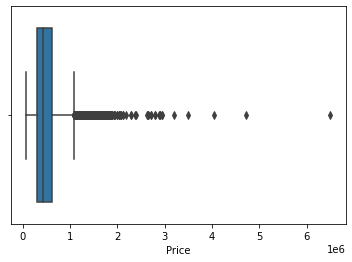

In [263]:
#lets check the box plot of our target column, to check if there are outliers
sns.boxplot(df.Price)
plt.show()

From the above plot we can see there are many outliers in the target column

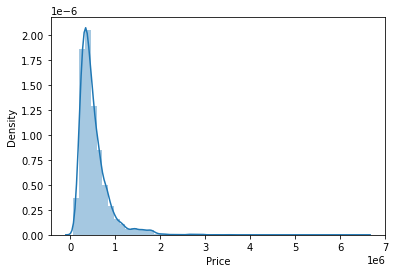

In [264]:

#lets check the distribution of the target column
sns.distplot(df.Price)
plt.show()

From the above plot we can see that data is right skewed in target column

## Bivariate Analysis with Target Variable

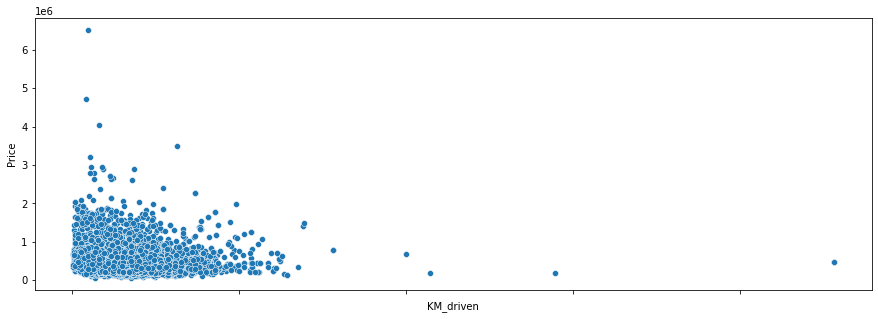

In [267]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col1 = sns.scatterplot(x = df['KM_driven'] , y =df['Price'] )
col1.set_xticklabels(col1.get_xticklabels(), rotation=40, ha="right") 
plt.show()

In [ ]:
#we don't see any linaer relationship between Km_driven and Price

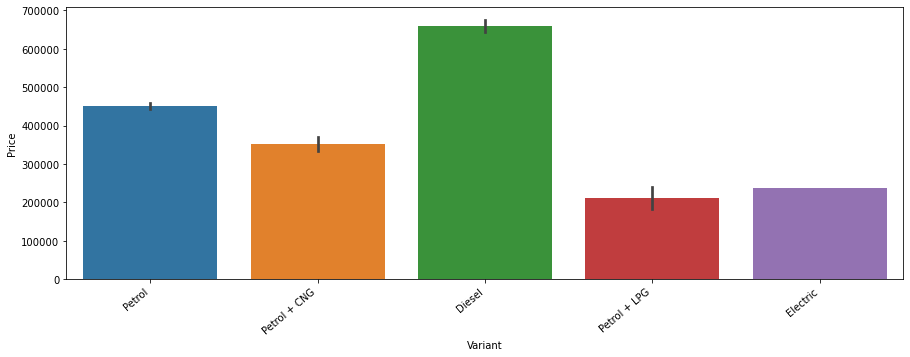

In [268]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col7 = sns.barplot(x = 'Variant' , y ='Price', data = df )
col7.set_xticklabels(col7.get_xticklabels(), rotation=40, ha="right") 
plt.show()

In [275]:
#we can see that diesel variant has more price compare to petrol varinat

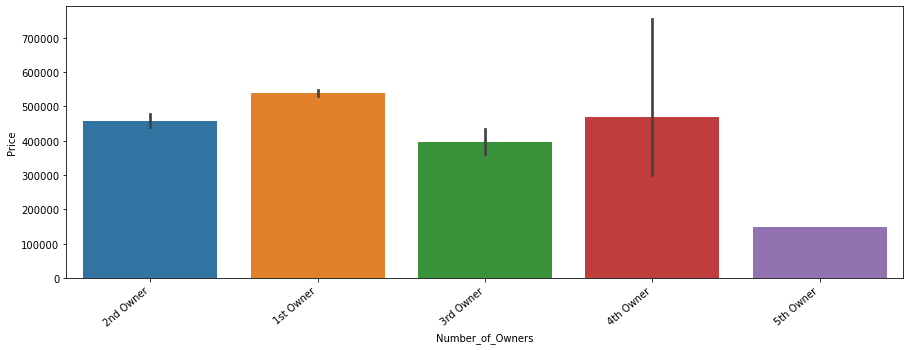

In [269]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col7 = sns.barplot(x = 'Number_of_Owners' , y ='Price', data = df )
col7.set_xticklabels(col7.get_xticklabels(), rotation=40, ha="right") 
plt.show()

In [276]:
#we can see that 1st Owne has more price compare to 2nd,3rd,4th,5th varinat

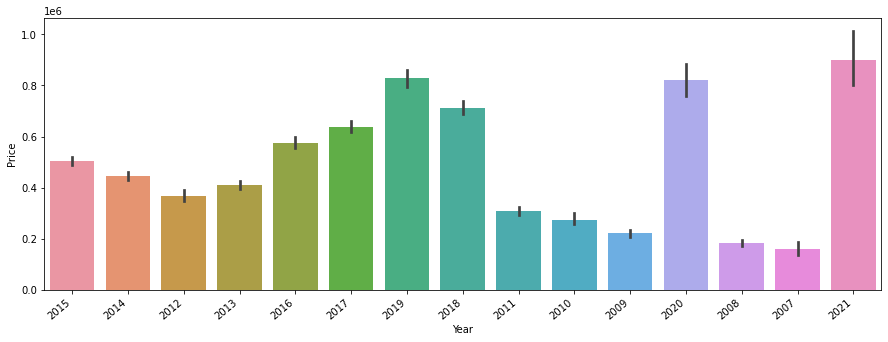

In [270]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col7 = sns.barplot(x = 'Year' , y ='Price', data = df )
col7.set_xticklabels(col7.get_xticklabels(), rotation=40, ha="right") 
plt.show()

In [ ]:
#we can see that if the car is recently purchased than the  price is high

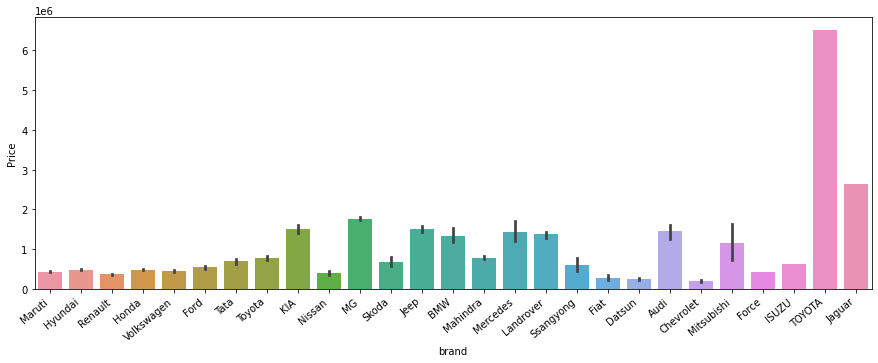

In [272]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col7 = sns.barplot(x = 'brand' , y ='Price', data = df )
col7.set_xticklabels(col7.get_xticklabels(), rotation=40, ha="right") 
plt.show()

In [277]:
#we can see that Toyota,Audi,Jaguar has more price compare to all

## Encoding the Object Columns

In [167]:
df.dtypes

KM_driven            int32
Variant             object
Number_of_Owners    object
Price                int32
Location            object
Year                object
brand               object
Model               object
dtype: object

In [169]:
df.Variant.value_counts()

Petrol          4686
Diesel          2540
Petrol + CNG     226
Petrol + LPG      15
Electric           1
Name: Variant, dtype: int64

In [170]:
one_hot_columns = ['Variant','Number_of_Owners', 'Location','Year','brand', 'Model']

In [171]:
df_new = pd.get_dummies(data = df,columns=one_hot_columns)

In [172]:
df_new

KM_driven    Price  Variant_Diesel  Variant_Electric  Variant_Petrol  \
0         7478   263599               0                 0               1   
1        15206   355499               0                 0               1   
2         9969   278599               0                 0               1   
3         9013   340999               0                 0               1   
4        21852   260999               0                 0               1   
..         ...      ...             ...               ...             ...   
786      24939  2082799               0                 0               1   
787      69860   504000               1                 0               0   
788     144202   523999               0                 0               1   
789      30475  1050299               1                 0               0   
790     103525   338599               1                 0               0   

     Variant_Petrol + CNG  Variant_Petrol + LPG  Number_of_Owners_1st Owner  \
0                       0                     0                           0   
1                       0                     0                           1   
2                       0                     0                           1   
3                       0                     0                           1   
4                       0                     0                           1   
..                    ...                   ...                         ...   
786                     0                     0                           1   
787                     0                     0                           0   
788                     0                     0                           1   
789                     0                     0                           1   
790                     0                     0                           0   

     Number_of_Owners_2nd Owner  Number_of_Owners_3rd Owner  ...  \
0                             1                           0  ...   
1                             0                           0  ...   
2                             0                           0  ...   
3                             0                           0  ...   
4                             0                           0  ...   
..                          ...                         ...  ...   
786                           0                           0  ...   
787                           1                           0  ...   
788                           0                           0  ...   
789                           0                           0  ...   
790                           1                           0  ...   

     Model_XUV 3OO  Model_XUV500  Model_Xcent  Model_Xylo  Model_YARIS  \
0                0             0            0           0            0   
1                0             0            0           0            0   
2                0             0            0           0            0   
3                0             0            0           0            0   
4                0             0            0           0            0   
..             ...           ...          ...         ...          ...   
786              0             0            0           0            0   
787              0             0            0           0            0   
788              0             0            0           0            0   
789              0             0            0           0            0   
790              0             0            0           0            0   

     Model_Zen Estilo  Model_Zest  Model_i10  Model_i20  Model_i20 Active  
0                   0           0          0          0                 0  
1                   0           0          0          0                 0  
2                   0           0          0          0                 0  
3                   0           0          0          0                 0  
4                   0           0          0 

In [174]:
#now we have 228 columns after enoding object columns
df_new.shape

(7468, 228)

## Scaling the Data

In [175]:
#lets split our x and y column before scaling
#x and y spitting
Y = df_new['Price']
X = df_new.drop('Price',axis = 1)

In [176]:
#Lets scale the data using standard scaler
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X),columns= X.columns)
scaled_X.head()

KM_driven  Variant_Diesel  Variant_Electric  Variant_Petrol  \
0  -1.189945       -0.717929         -0.011572        0.770508   
1  -1.011090       -0.717929         -0.011572        0.770508   
2  -1.132294       -0.717929         -0.011572        0.770508   
3  -1.154420       -0.717929         -0.011572        0.770508   
4  -0.857276       -0.717929         -0.011572        0.770508   

   Variant_Petrol + CNG  Variant_Petrol + LPG  Number_of_Owners_1st Owner  \
0             -0.176655             -0.044862                   -1.802223   
1             -0.176655             -0.044862                    0.554870   
2             -0.176655             -0.044862                    0.554870   
3             -0.176655             -0.044862                    0.554870   
4             -0.176655             -0.044862                    0.554870   

   Number_of_Owners_2nd Owner  Number_of_Owners_3rd Owner  \
0                    2.010607                   -0.189166   
1                   -0.497362                   -0.189166   
2                   -0.497362                   -0.189166   
3                   -0.497362                   -0.189166   
4                   -0.497362                   -0.189166   

   Number_of_Owners_4th Owner  ...  Model_XUV 3OO  Model_XUV500  Model_Xcent  \
0                   -0.047766  ...      -0.020047     -0.104059     -0.06862   
1                   -0.047766  ...      -0.020047     -0.104059     -0.06862   
2                   -0.047766  ...      -0.020047     -0.104059     -0.06862   
3                   -0.047766  ...      -0.020047     -0.104059     -0.06862   
4                   -0.047766  ...      -0.020047     -0.104059     -0.06862   

   Model_Xylo  Model_YARIS  Model_Zen Estilo  Model_Zest  Model_i10  \
0   -0.028356    -0.040118         -0.044862   -0.025884  -0.185335   
1   -0.028356    -0.040118         -0.044862   -0.025884  -0.185335   
2   -0.028356    -0.040118         -0.044862   -0.025884  -0.185335   
3   -0.028356    -0.040118         -0.044862   -0.025884  -0.185335   
4   -0.028356    -0.040118         -0.044862   -0.025884  -0.185335   

   Model_i20  Model_i20 Active  
0  -0.164173         -0.056781  
1  -0.164173         -0.056781  
2  -0.164173         -0.056781  
3  -0.164173         -0.056781  
4  -0.164173         -0.056781  

[5 rows x 227 columns]

In [177]:
#now our data is scaled using standard scaler

## PCA (Principal Component Analysis)

In [178]:

#we need to use pca becuase we have 227 columns in this dataset which is very high

In [179]:
#we should always use scaled data for performing the PCA

In [181]:
#we have 227 columns excluding target variable
scaled_X.shape

(7468, 227)

In [182]:
#first lets TEST out percentage of data that we will obtain after PCA
testpca = PCA()
test_x = testpca.fit(scaled_X)

In [183]:
#now lets out cumulative score 
cum_score = np.cumsum(test_x.explained_variance_ratio_)*100
cum_score

array([  1.46430017,   2.73611128,   3.81865335,   4.80306849,
         5.76515111,   6.7098963 ,   7.64248731,   8.57121214,
         9.48890955,  10.40272984,  11.30281039,  12.1985128 ,
        13.09250275,  13.98459188,  14.8744972 ,  15.7626116 ,
        16.64995249,  17.53635722,  18.42153726,  19.30590081,
        20.18949441,  21.07214027,  21.95434116,  22.83621538,
        23.71781921,  24.59918301,  25.47053356,  26.30032659,
        27.09787725,  27.86144863,  28.5684282 ,  29.21711901,
        29.86322837,  30.4991147 ,  31.13091557,  31.7365504 ,
        32.33800888,  32.93307393,  33.52006563,  34.10240061,
        34.67825563,  35.24912457,  35.81440086,  36.37331018,
        36.92126643,  37.46176218,  37.99487378,  38.51927921,
        39.03192923,  39.54121742,  40.04324851,  40.51530277,
        40.98322518,  41.4462213 ,  41.9017471 ,  42.35605385,
        42.8095253 ,  43.26232518,  43.71423004,  44.16596332,
        44.61625994,  45.06614836,  45.51475421,  45.96

In [184]:
#lets check how many columns gives 95% of variance
s = np.argmax(cum_score > 95)
print("Number of components expaining 95% of variance is :", s)

Number of components expaining 95% of variance is : 175


In [190]:
#lets check how many columns gives 95% of variance
s = np.argmax(cum_score > 90)
print("Number of components expaining 95% of variance is :", s)

Number of components expaining 95% of variance is : 163


In [187]:
#lets check how many columns gives 95% of variance
s = np.argmax(cum_score > 85)
print("Number of components expaining 95% of variance is :", s)

Number of components expaining 95% of variance is : 152


In [188]:
#now we have seen that how much data will be lost based number of columns

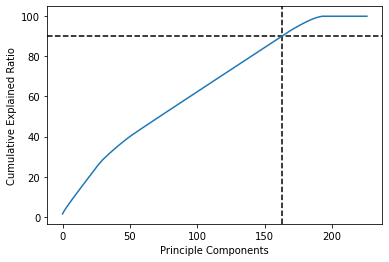

In [191]:
#lets plot the graph for graphical understanding
plt.ylabel('Cumulative Explained Ratio')
plt.xlabel('Principle Components')

plt.axvline(x = s, color = 'k', linestyle = '--')
plt.axhline(y = 90, color = 'k', linestyle = '--')

plt.plot(cum_score)
plt.show()

In [192]:
#lets perform the PCA with 163 columns which is 90% of our data
Final_pca = PCA(n_components= 163)

pca_x = pd.DataFrame(Final_pca.fit_transform(scaled_X))

In [193]:

#lets create a datafram
pca_x.head()

0         1         2         3         4         5         6    \
0 -1.271266  0.373463 -1.749075 -0.356339 -0.629607  0.597134  0.889041   
1 -1.382756 -1.206716 -1.153161  0.048844 -0.293021  0.316205  0.249708   
2 -1.491948 -1.215745 -1.156979 -0.059778 -0.524251  0.377993  0.208643   
3 -1.481760 -1.080482 -1.281698 -0.061993 -0.404738  0.399614  0.277632   
4 -1.053845 -0.858568 -1.748640 -0.379466 -0.118580  0.391602 -0.032932   

        7         8         9    ...       153       154       155       156  \
0  0.395922 -0.461134 -0.112664  ...  0.267641 -0.313122 -0.090238  0.749857   
1  0.282773  0.027779  0.476398  ...  0.031310  0.418787 -0.232353 -0.120223   
2  0.022776  0.073465  0.172474  ...  0.177867 -0.219143  0.035750  1.223437   
3  0.009931  0.112787  0.147683  ...  0.055025  0.083946 -0.190262  0.593783   
4  0.141373  0.085871 -0.056179  ...  0.200561  0.145449 -0.178465 -0.221378   

        157       158       159       160       161       162  
0  0.665068 -0.426664 -0.334381  0.120014 -0.080994  0.077870  
1  0.615749  0.316726  0.525827 -0.670443  0.266733 -0.762454  
2  0.705137  0.154966 -0.103062  0.039395 -0.093556  0.316329  
3 -0.122842  0.098362  0.579969 -0.202356 -0.525038  0.616727  
4  0.590554  0.861689 -0.425080  0.172602 -0.381339  0.678136  

[5 rows x 163 columns]

In [194]:

print("variance is : {}".format(np.sum(Final_pca.explained_variance_ratio_)))

variance is : 0.8943161712885779


In [195]:
pca_x.shape

(7468, 163)

## Best random state

In [196]:

max_r2score = 0
rand_state = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(pca_x,Y,test_size=.22,random_state= i )
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test,pred)
    if r2 > max_r2score:
        max_r2score = r2
        rand_state = i
print('Best r2 score is {} on random state {}'.format(max_r2score,rand_state))

Best r2 score is 0.7147396329604208 on random state 80


In [197]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 80


In [198]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(pca_x,Y,test_size=.22,random_state= rand_state )

In [199]:
lrg = LinearRegression()
lrg.fit(x_train,y_train)
pr =lrg.predict(x_test)
print("r2_score of linear refression is :", r2_score(y_test,pr))
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,pred))
print('mean squared error : ', mean_squared_error(y_test,pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

r2_score of linear refression is : 0.7147396329604208
Error :
mean absolute error : 322747.7148547901
mean squared error :  314951234126.353
root mean squared error : 561205.1622413617


## Model selection 

In [200]:

#lets Choose r2 score of below four Models
dtc = DecisionTreeRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor()
ada = AdaBoostRegressor()

In [202]:
#checking each model with Cross val score
model_list = [dtc,knn,rf,ada]
least_difference = []
for m in model_list:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cvs = cross_val_score(m,pca_x,Y,cv =5)
    print('\n')
    print(m)
    print('Scores :')
    print('r2 score:',r2_score(y_test,pred))
    print('Cross Val score :',cvs.mean())
    print('Error :')
    print('mean absolute error :',mean_absolute_error(y_test,pred))
    print('mean squared error : ', mean_squared_error(y_test,pred))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))
    print('Difference :')
    difference = np.abs(r2_score(y_test,pred) - cvs.mean())
    print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference))
    least_difference.append((m,'Diffrence between cross val score and r2 score error is : {0:.2f}'.format(difference)))



DecisionTreeRegressor()
Scores :
r2 score: 0.7528461715331013
Cross Val score : 0.6069220622456228
Error :
mean absolute error : 74721.89531345101
mean squared error :  29696371609.43518
root mean squared error : 172326.35204586436
Difference :
Diffrence between cross val score and r2 score is : 0.15


KNeighborsRegressor()
Scores :
r2 score: 0.7877873663083266
Cross Val score : 0.7489865630253523
Error :
mean absolute error : 67034.93925745587
mean squared error :  25498068427.327232
root mean squared error : 159681.1461235397
Difference :
Diffrence between cross val score and r2 score is : 0.04


RandomForestRegressor()
Scores :
r2 score: 0.8755518454032998
Cross Val score : 0.7941344821129037
Error :
mean absolute error : 58378.98059386141
mean squared error :  14952868292.335629
root mean squared error : 122281.92136344452
Difference :
Diffrence between cross val score and r2 score is : 0.08


AdaBoostRegressor()
Scores :
r2 score: 0.3183325869702016
Cross Val score : 0.178258591

In [204]:
#Random forest and KNN are giving high r2 score, but KNN is having no overfitting

## 1. Random forest regressor - hyperparameter tuning

In [206]:
#lets use random forest regressor
#it takes a lot lot of time approx 6 hours, so commented after
parameters = {'n_estimators' : [100,200,300],'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
gsvrf = RandomizedSearchCV(rf, parameters, cv=5,scoring="r2")
gsvrf.fit(x_train,y_train)
print(gsvrf.best_score_)
print(gsvrf.best_params_)

0.802177253374205
{'n_estimators': 300, 'max_features': 'auto', 'criterion': 'mse'}


## 2. KNN regressor - Hyperparameter tuning

In [207]:
#lets create the parameter list to pass in Randomised seracgh cv
parameters = {'n_neighbors':list(range(5,16,2)),'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size':list(range(25,35))}
#using randomised search CV
gsvkn = RandomizedSearchCV(estimator= knn , param_distributions= parameters,cv =5)
gsvkn.fit(x_train,y_train) 
print(gsvkn.best_score_)
print(gsvkn.best_params_)

0.7480288053158278
{'weights': 'distance', 'n_neighbors': 11, 'leaf_size': 31, 'algorithm': 'brute'}


In [211]:
#we got our best parameters for knn using the randomized serach cv

## creating knn model using these parameters

In [212]:
#lets create knn model using these parameters
print('KNeighborsRegressor')
hyper_p_knn = KNeighborsRegressor(n_neighbors= 11 ,weights= 'distance', leaf_size= 31, algorithm= 'brute')
hyper_p_knn.fit(x_train,y_train)
hyper_p_pred = hyper_p_knn.predict(x_test)
cvs = cross_val_score(hyper_p_knn,pca_x,Y,cv =5)
print('\n')
print('Scores :')
print('r2 score:',r2_score(y_test,hyper_p_pred))
print('Cross Val score :',cvs.mean())
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,hyper_p_pred))
print('mean squared error : ', mean_squared_error(y_test,hyper_p_pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,hyper_p_pred)))
print('Difference :')
difference = np.abs(r2_score(y_test,hyper_p_pred) - cvs.mean())
print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference))

KNeighborsRegressor


Scores :
r2 score: 0.8098835755456149
Cross Val score : 0.7575382800120137
Error :
mean absolute error : 63571.458170922444
mean squared error :  22843133867.985664
root mean squared error : 151139.45172583387
Difference :
Diffrence between cross val score and r2 score is : 0.05


## Creating Random Forest model using these parameters

In [214]:
final_model_rf = RandomForestRegressor(n_estimators= 300,criterion= 'mse',max_features = 'auto')
final_model_rf.fit(x_train,y_train)
final_pred = final_model_rf.predict(x_test)
cvs = cross_val_score(final_model_rf,pca_x,Y,cv =5)
print('\n')
print('Scores :')
print('r2 score:',r2_score(y_test,final_pred))
print('Cross Val score :',cvs.mean())
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,final_pred))
print('mean squared error : ', mean_squared_error(y_test,final_pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,final_pred)))
print('Difference :')
difference = np.abs(r2_score(y_test,final_pred) - cvs.mean())
print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference))
least_difference.append((m,'Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference)))



Scores :
r2 score: 0.8747784493549933
Cross Val score : 0.7975578175958449
Error :
mean absolute error : 57946.30329797409
mean squared error :  15045794453.319029
root mean squared error : 122661.29973760684
Difference :
Diffrence between cross val score and r2 score is : 0.08


In [216]:
#now our r2 score got incresed 86.66% after hyperparameter tuning
#diffrence between cross val score and r2 score is also 0.08
#which means no overfitting

## Saving the model:

In [217]:
#serialization using joblib
import joblib
joblib.dump(final_model_rf,'Cars_Price.obj')

['Cars_Price.obj']

In [219]:

Cars_Price = joblib.load('Cars_Price.obj')

In [220]:

s_pred = Cars_Price.predict(x_test)

In [221]:

r2_score(y_test,s_pred)

0.8747784493549933

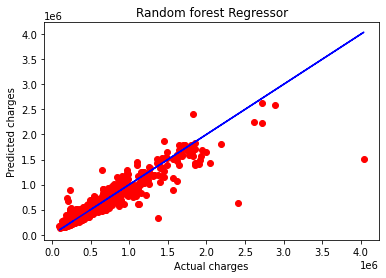

In [222]:
#lets plot y_test vs predicted 

plt.figure(figsize=(6,4))
plt.scatter(x = y_test,y = s_pred,color = 'r')
plt.plot(y_test,y_test,color = 'b')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Random forest Regressor')
plt.show()

### we can see that values are very close to the line

## Conclusuion : predicted x_test

In [224]:

#lets make a dataframe of actual answers vs predicted answers
conclusion = pd.DataFrame((Cars_Price.predict(x_test)[:],y_test[:]),index= ['Predicted','Actual'])
conclusion

0              1          2          3              4     \
Predicted  593185.113333  794543.003333  461893.41  693994.32  347907.743333   
Actual     491799.000000  834499.000000  433799.00  490399.00  344899.000000   

                    5              6           7              8     \
Predicted  541595.216667  240601.486667  1331834.12  476336.676667   
Actual     246000.000000  137499.000000  1429999.00  451099.000000   

                    9     ...       1633           1634           1635  \
Predicted  729334.716667  ...  380641.67  295066.366667  694431.363333   
Actual     676000.000000  ...  346799.00  335599.000000  587399.000000   

                    1636           1637           1638           1639  \
Predicted  588376.603333  291689.666667  632303.046667  222292.873333   
Actual     526499.000000  315299.000000  711699.000000  171799.000000   

               1640           1641       1642  
Predicted  435663.7  315924.366667  230255.41  
Actual     506399.0  331399.000000  270499.00  

[2 rows x 1643 columns]